<a href="https://colab.research.google.com/github/UKJaagadhep/Data-science-and-machine-learning/blob/main/Fetal_health_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer

In [50]:
df = pd.read_csv('/content/fetal_health.csv')
df
#Fetal health: 1 - Normal, 2 - Suspect, 3 - Pathological

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [51]:
df.isna().sum()

,0
baseline value,0
accelerations,0
fetal_movement,0
uterine_contractions,0
light_decelerations,0
severe_decelerations,0
prolongued_decelerations,0
abnormal_short_term_variability,0
mean_value_of_short_term_variability,0
percentage_of_time_with_abnormal_long_term_variability,0


In [52]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
print(iqr)

baseline value                                            14.000
accelerations                                              0.006
fetal_movement                                             0.003
uterine_contractions                                       0.005
light_decelerations                                        0.003
severe_decelerations                                       0.000
prolongued_decelerations                                   0.000
abnormal_short_term_variability                           29.000
mean_value_of_short_term_variability                       1.000
percentage_of_time_with_abnormal_long_term_variability    11.000
mean_value_of_long_term_variability                        6.200
histogram_width                                           63.000
histogram_min                                             53.000
histogram_max                                             22.000
histogram_number_of_peaks                                  4.000
histogram_number_of_zeroe

In [53]:
df_cleaned = df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis = 1)]
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [54]:
x = df.drop('fetal_health', axis = 1)
y = df['fetal_health']

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 42)

In [56]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [62]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [63]:
y_pred = model.predict(x_test)

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.94      0.95      0.95       332
         2.0       0.72      0.69      0.71        59
         3.0       0.88      0.83      0.85        35

    accuracy                           0.91       426
   macro avg       0.85      0.83      0.84       426
weighted avg       0.90      0.91      0.91       426



In [65]:
print(confusion_matrix(y_test, y_pred))

[[316  15   1]
 [ 15  41   3]
 [  5   1  29]]


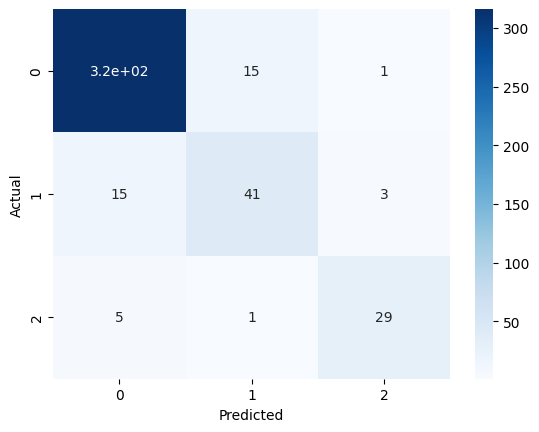

In [66]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

[Text(0.4318374134130982, 0.9666666666666667, 'mean_value_of_short_term_variability <= -0.899\ngini = 0.368\nsamples = 1700\nvalue = [1323, 236, 141]\nclass = Normal'),
 Text(0.24338790931989923, 0.9, 'percentage_of_time_with_abnormal_long_term_variability <= 3.167\ngini = 0.588\nsamples = 296\nvalue = [78, 165, 53]\nclass = Suspect'),
 Text(0.18073047858942065, 0.8333333333333334, 'abnormal_short_term_variability <= 0.738\ngini = 0.507\nsamples = 259\nvalue = [74, 165, 20]\nclass = Suspect'),
 Text(0.08564231738035265, 0.7666666666666667, 'percentage_of_time_with_abnormal_long_term_variability <= 2.761\ngini = 0.361\nsamples = 55\nvalue = [42, 13, 0]\nclass = Normal'),
 Text(0.07556675062972293, 0.7, 'histogram_variance <= -0.422\ngini = 0.291\nsamples = 51\nvalue = [42, 9, 0]\nclass = Normal'),
 Text(0.05037783375314862, 0.6333333333333333, 'histogram_min <= 1.426\ngini = 0.223\nsamples = 47\nvalue = [41, 6, 0]\nclass = Normal'),
 Text(0.030226700251889168, 0.5666666666666667, 'histo

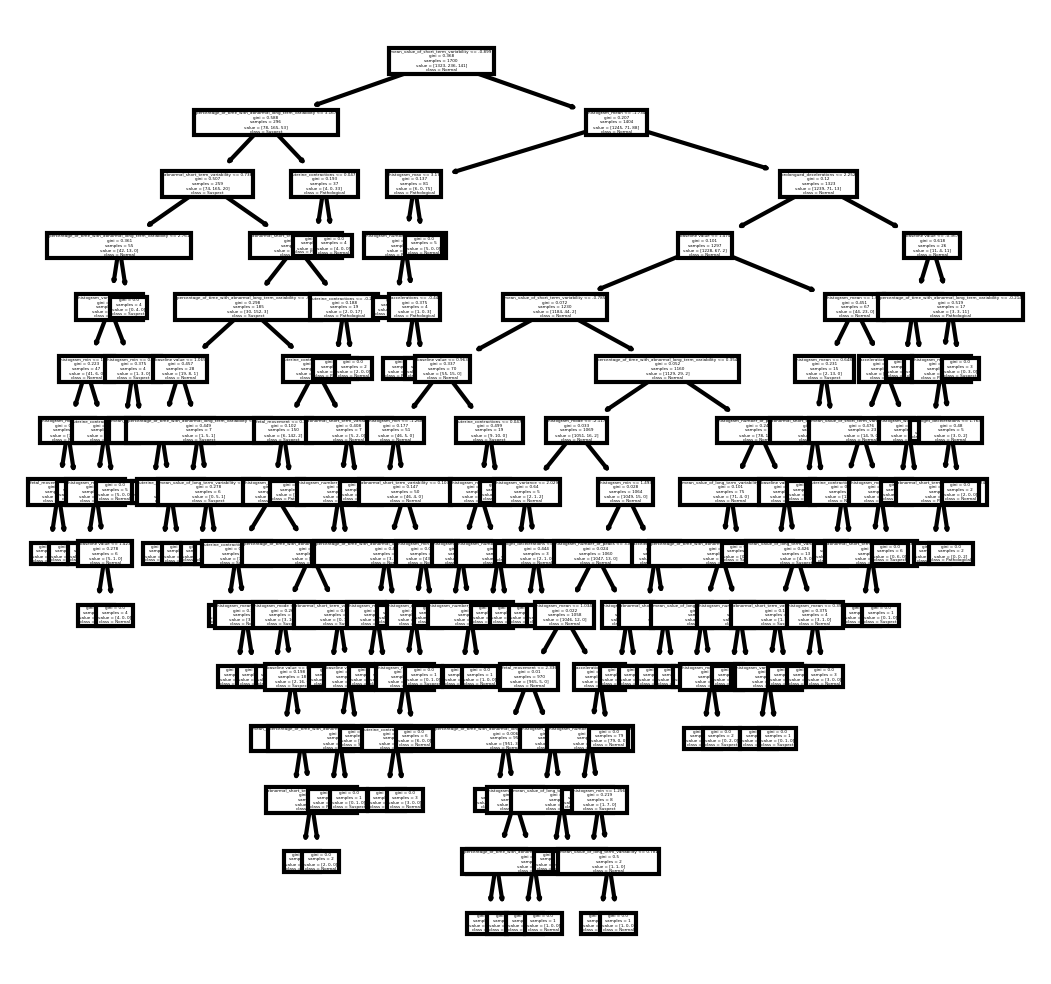

In [73]:
fn=x.columns
cn=['Normal', 'Suspect', 'Pathological']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
from sklearn import tree
tree.plot_tree(model, feature_names = fn, class_names=cn)